# Data Scientist Professional Practical Exam Submission

**Use this template to write up your summary for submission. Code in Python or R needs to be included.**


## 📝 Task List

Your written report should include both code, output and written text summaries of the following:
- Data Validation:   
  - Describe validation and cleaning steps for every column in the data 
- Exploratory Analysis:  
  - Include two different graphics showing single variables only to demonstrate the characteristics of data  
  - Include at least one graphic showing two or more variables to represent the relationship between features
  - Describe your findings
- Model Development
  - Include your reasons for selecting the models you use as well as a statement of the problem type
  - Code to fit the baseline and comparison models
- Model Evaluation
  - Describe the performance of the two models based on an appropriate metric
- Business Metrics
  - Define a way to compare your model performance to the business
  - Describe how your models perform using this approach
- Final summary including recommendations that the business should undertake

*Start writing report here..*

## Data Validation

I validated the data by handling missing values, removing unnecessary columns, and preparing categorical columns to ensure the dataset is ready for exploratory analysis. Follow are the changes for each column:

Target Variable:

- high_trafic: Two possible values, 'High' and NaN. Missing values indicate non-high-traffic recipes, so I replaced NaN values with 'Low.

Feature Variables:

- recipe: Integer data type, representing a unique ID for each recipe. This column was removed.
- calories: Float data type, with 52 missing values, which were removed.
- carbohydrate: Float data type, with 52 missing values, which were removed.
- sugar: Float data type, with 52 missing values, which were removed.
- protein: Float data type, with 52 missing values, which were removed.
- category: Categorical data type with 6 unique categories, of which 2 overlap with other categories. There are no missing values.
- serving: Categorical data type with 11 unique categories. No missing values.

After cleaning, the dataset contains 895 rows and 7 columns.

Import the libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from sklearn.metrics import roc_curve, accuracy_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from itertools import product

Import the dataset

In [2]:
df = pd.read_csv('recipe_site_traffic_2212.csv',delimiter = ',')

Overview of the data

In [3]:
df.head()

,recipe,calories,carbohydrate,sugar,protein,category,servings,high_traffic
0,1,NaN,NaN,NaN,NaN,Pork,6,High
1,2,35.48,38.56,0.66,0.92,Potato,4,High
2,3,914.28,42.68,3.09,2.88,Breakfast,1,NaN
3,4,97.03,30.56,38.63,0.02,Beverages,4,High
4,5,27.05,1.85,0.80,0.53,Beverages,4,NaN


In [4]:
df.shape

(947, 8)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 947 entries, 0 to 946
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   recipe        947 non-null    int64  
 1   calories      895 non-null    float64
 2   carbohydrate  895 non-null    float64
 3   sugar         895 non-null    float64
 4   protein       895 non-null    float64
 5   category      947 non-null    object 
 6   servings      947 non-null    object 
 7   high_traffic  574 non-null    object 
dtypes: float64(4), int64(1), object(3)
memory usage: 59.3+ KB


In [6]:
df.isna().sum()

recipe            0
calories         52
carbohydrate     52
sugar            52
protein          52
category          0
servings          0
high_traffic    373
dtype: int64

In [7]:
# validate recipe
df['recipe'].nunique()

947

In [8]:
# validate calories
df['calories'].nunique()

891

In [9]:
# validate carbohydrate
df['carbohydrate'].nunique()

835

In [10]:
# validate sugar
df['sugar'].nunique()

666

In [11]:
# validate protein
df['protein'].nunique()

772

In [12]:
# validate category
df['category'].nunique()

11

In [13]:
# validate servings
df['servings'].nunique()

6

In [14]:
# validate high_traffic
df['high_traffic'].nunique()

1

In [15]:
df['category'].unique()

array(['Pork', 'Potato', 'Breakfast', 'Beverages', 'One Dish Meal',
       'Chicken Breast', 'Lunch/Snacks', 'Chicken', 'Vegetable', 'Meat',
       'Dessert'], dtype=object)

In [16]:
df['servings'].unique()

array(['6', '4', '1', '2', '4 as a snack', '6 as a snack'], dtype=object)

In [17]:
# replace null values of high_traffic with Low
df['high_traffic'].fillna("Low", inplace = True)
df.head()

,recipe,calories,carbohydrate,sugar,protein,category,servings,high_traffic
0,1,NaN,NaN,NaN,NaN,Pork,6,High
1,2,35.48,38.56,0.66,0.92,Potato,4,High
2,3,914.28,42.68,3.09,2.88,Breakfast,1,Low
3,4,97.03,30.56,38.63,0.02,Beverages,4,High
4,5,27.05,1.85,0.80,0.53,Beverages,4,Low


In [18]:
# still 11 unique values
df['category'].unique()

array(['Pork', 'Potato', 'Breakfast', 'Beverages', 'One Dish Meal',
       'Chicken Breast', 'Lunch/Snacks', 'Chicken', 'Vegetable', 'Meat',
       'Dessert'], dtype=object)

In [19]:
# still 6 unique values
df['servings'].unique()

array(['6', '4', '1', '2', '4 as a snack', '6 as a snack'], dtype=object)

In [20]:
df.groupby(['servings'])['category'].count()

servings
1               175
2               183
4               389
4 as a snack      2
6               197
6 as a snack      1
Name: category, dtype: int64

In [21]:
df['servings'] = df['servings'].replace({"4 as a snack": '4', "6 as a snack": '6'}).astype('int')
df.groupby(['servings'])['recipe'].count()

servings
1    175
2    183
4    391
6    198
Name: recipe, dtype: int64

In [22]:
df['category'] = df['category'].replace({"Chicken Breast": 'Chicken'})
df.groupby(['category'])['recipe'].count()

category
Beverages         92
Breakfast        106
Chicken          172
Dessert           83
Lunch/Snacks      89
Meat              79
One Dish Meal     71
Pork              84
Potato            88
Vegetable         83
Name: recipe, dtype: int64

In [23]:
# added new columns: nutritional components in all servings, not per one
nutritional = ['calories', 'carbohydrate', 'sugar', 'protein']
for name in nutritional:
    df[name + "_1"] = df[name] * df['servings']

In [24]:
# Find the columns contain outliers
outlier_counts = {}

for column in df.select_dtypes(include='number').columns:
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    outlier_counts[column] = ((df[column] < lower_bound) | (df[column] > upper_bound)).sum()

print(outlier_counts)

{'recipe': 0, 'calories': 47, 'carbohydrate': 58, 'sugar': 79, 'protein': 77, 'servings': 0, 'calories_1': 60, 'carbohydrate_1': 74, 'sugar_1': 71, 'protein_1': 82}


In [25]:
# Fill the na values with the mean (calculated without outliers) for the columns with na values 
for column in df.columns[df.isna().any()]:
    mean_value = df.loc[(df[column] >= lower_bound) & (df[column] <= upper_bound), column].mean()
    df[column].fillna(mean_value, inplace=True)

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 947 entries, 0 to 946
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   recipe          947 non-null    int64  
 1   calories        947 non-null    float64
 2   carbohydrate    947 non-null    float64
 3   sugar           947 non-null    float64
 4   protein         947 non-null    float64
 5   category        947 non-null    object 
 6   servings        947 non-null    int64  
 7   high_traffic    947 non-null    object 
 8   calories_1      947 non-null    float64
 9   carbohydrate_1  947 non-null    float64
 10  sugar_1         947 non-null    float64
 11  protein_1       947 non-null    float64
dtypes: float64(8), int64(2), object(2)
memory usage: 88.9+ KB


In [27]:
# Drop the recipe because it's an id, and it's useless for exploratory analysis and classification.
df = df.drop('recipe', axis=1)


In [28]:
# keep only the columns with the correct nutritional according to the servings
df = df.drop(['calories','carbohydrate','sugar','protein'], axis=1)


In [29]:
#validate any negative values in numeric variables
df.describe()

,servings,calories_1,carbohydrate_1,sugar_1,protein_1
count,947.000000,947.000000,947.000000,947.000000,947.000000
mean,3.477297,1404.547253,116.749523,30.694657,80.360577
std,1.732741,1863.336504,173.969126,53.340324,153.041476
min,1.000000,0.280000,0.100000,0.060000,0.000000
25%,2.000000,241.105000,24.250000,4.455000,9.610000
50%,4.000000,725.560000,62.341311,14.440000,38.400000
75%,4.000000,1867.330000,138.990000,31.620000,85.250000
max,6.000000,17436.060000,2121.680000,521.820000,2180.160000


In [30]:
df.drop_duplicates().shape

(922, 7)

---
## Exploratory Analysis

To examine the fields, I focused on the target variable, the high_traffic column, and how it was affected by the others.

- First, I used the correlation method to understand how the feature variables affect the target variable.
- Second, I investigated the feature variables, whether they affected the target variable or not, to have a clearer view.
- Lastly, I used hypothesis testing to ensure the effectiveness of the category field.   

### Target Variable - high_traffic

The high_traffic column is the most important since the analysis and predictions will be based on it. The following chart shows the distribution of the high_traffic column and shows that the recipes tend to have high traffic.

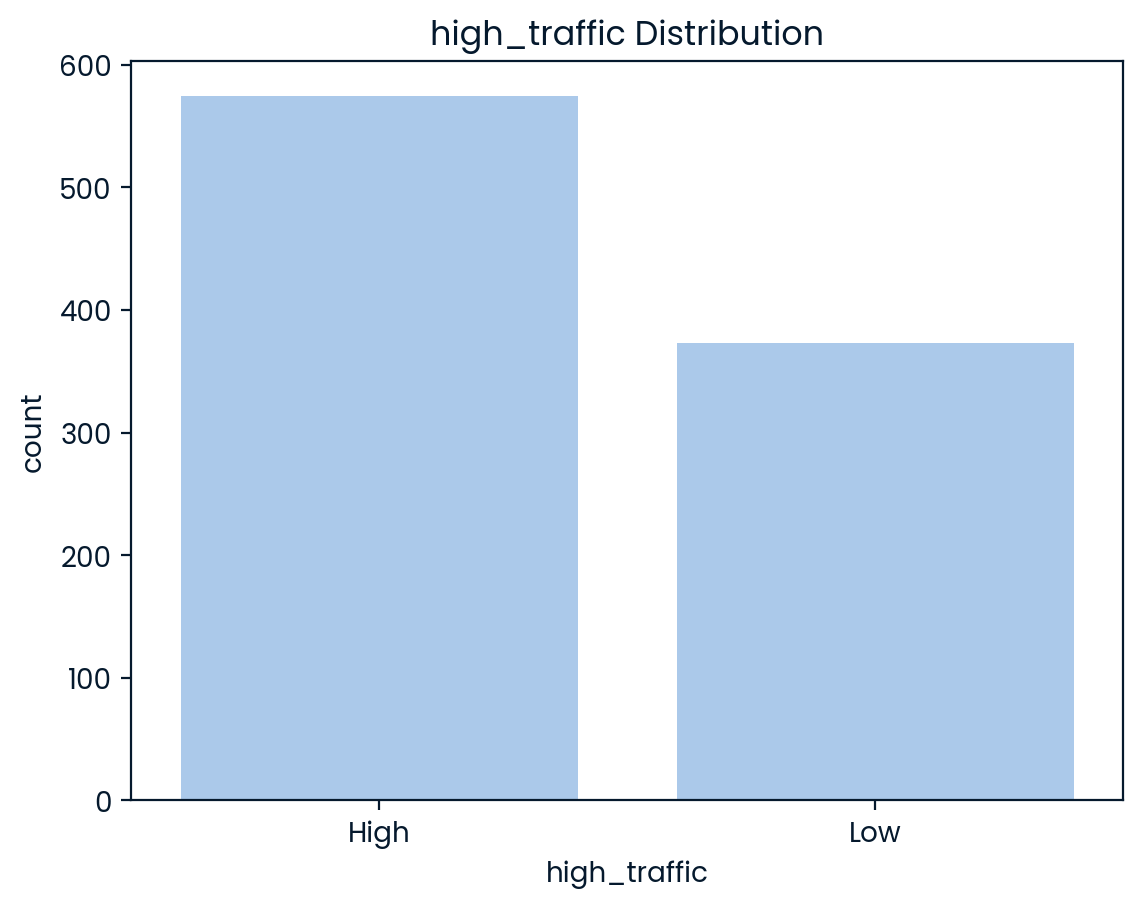

In [31]:
sns.set_palette(sns.color_palette("pastel"))

sns.countplot(data=df, x="high_traffic")
plt.title('high_traffic Distribution')

plt.show()

### Correlation Matrix

The following correlation matrix shows the correlation of the numeric and categorical variables with the target variable. There is a correlation between the categorical variable category. According to the matrix, no notable correlation exists between serving categorical variables or any other numeric variables. 

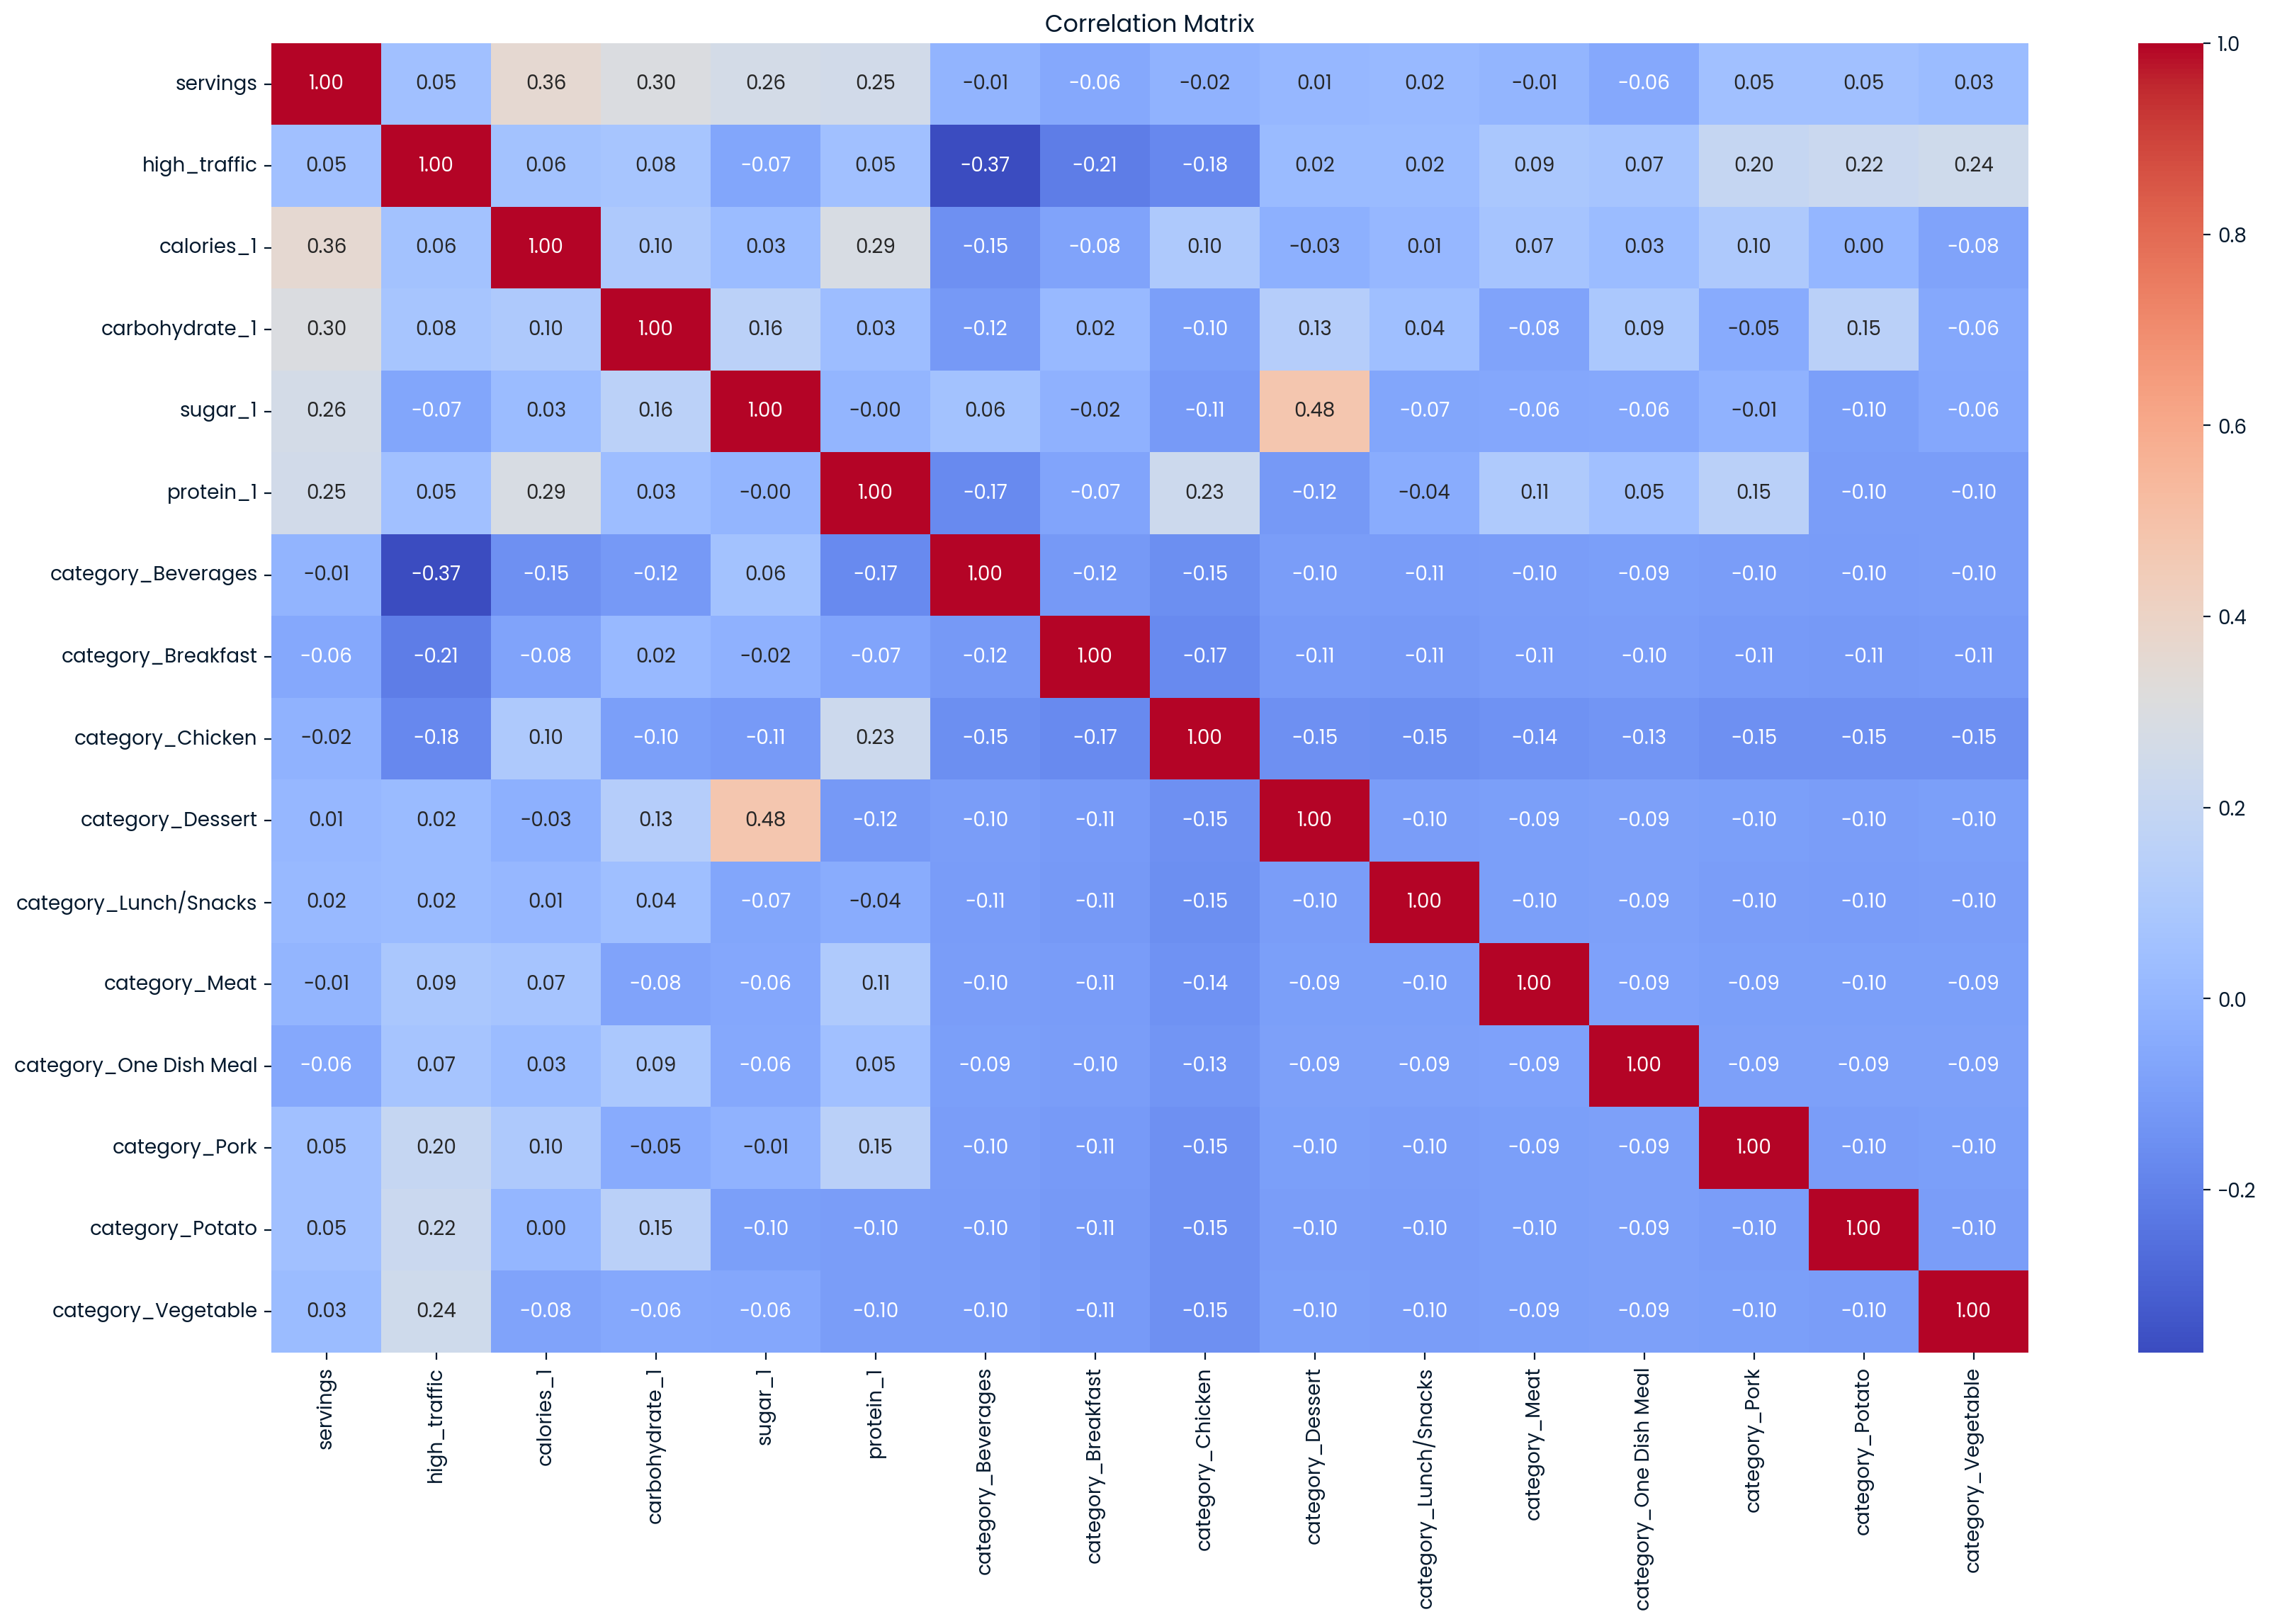

In [32]:
df_encoded = pd.get_dummies(df, columns=['category'])
df_encoded['high_traffic'] = df_encoded['high_traffic'].apply(lambda x: 1 if x == 'High' else 0)

plt.figure(figsize=(20, 12))
sns.heatmap(df_encoded.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

### Numeric Variables

The distribution of the 4 numeric variables with the high_traffic variable.

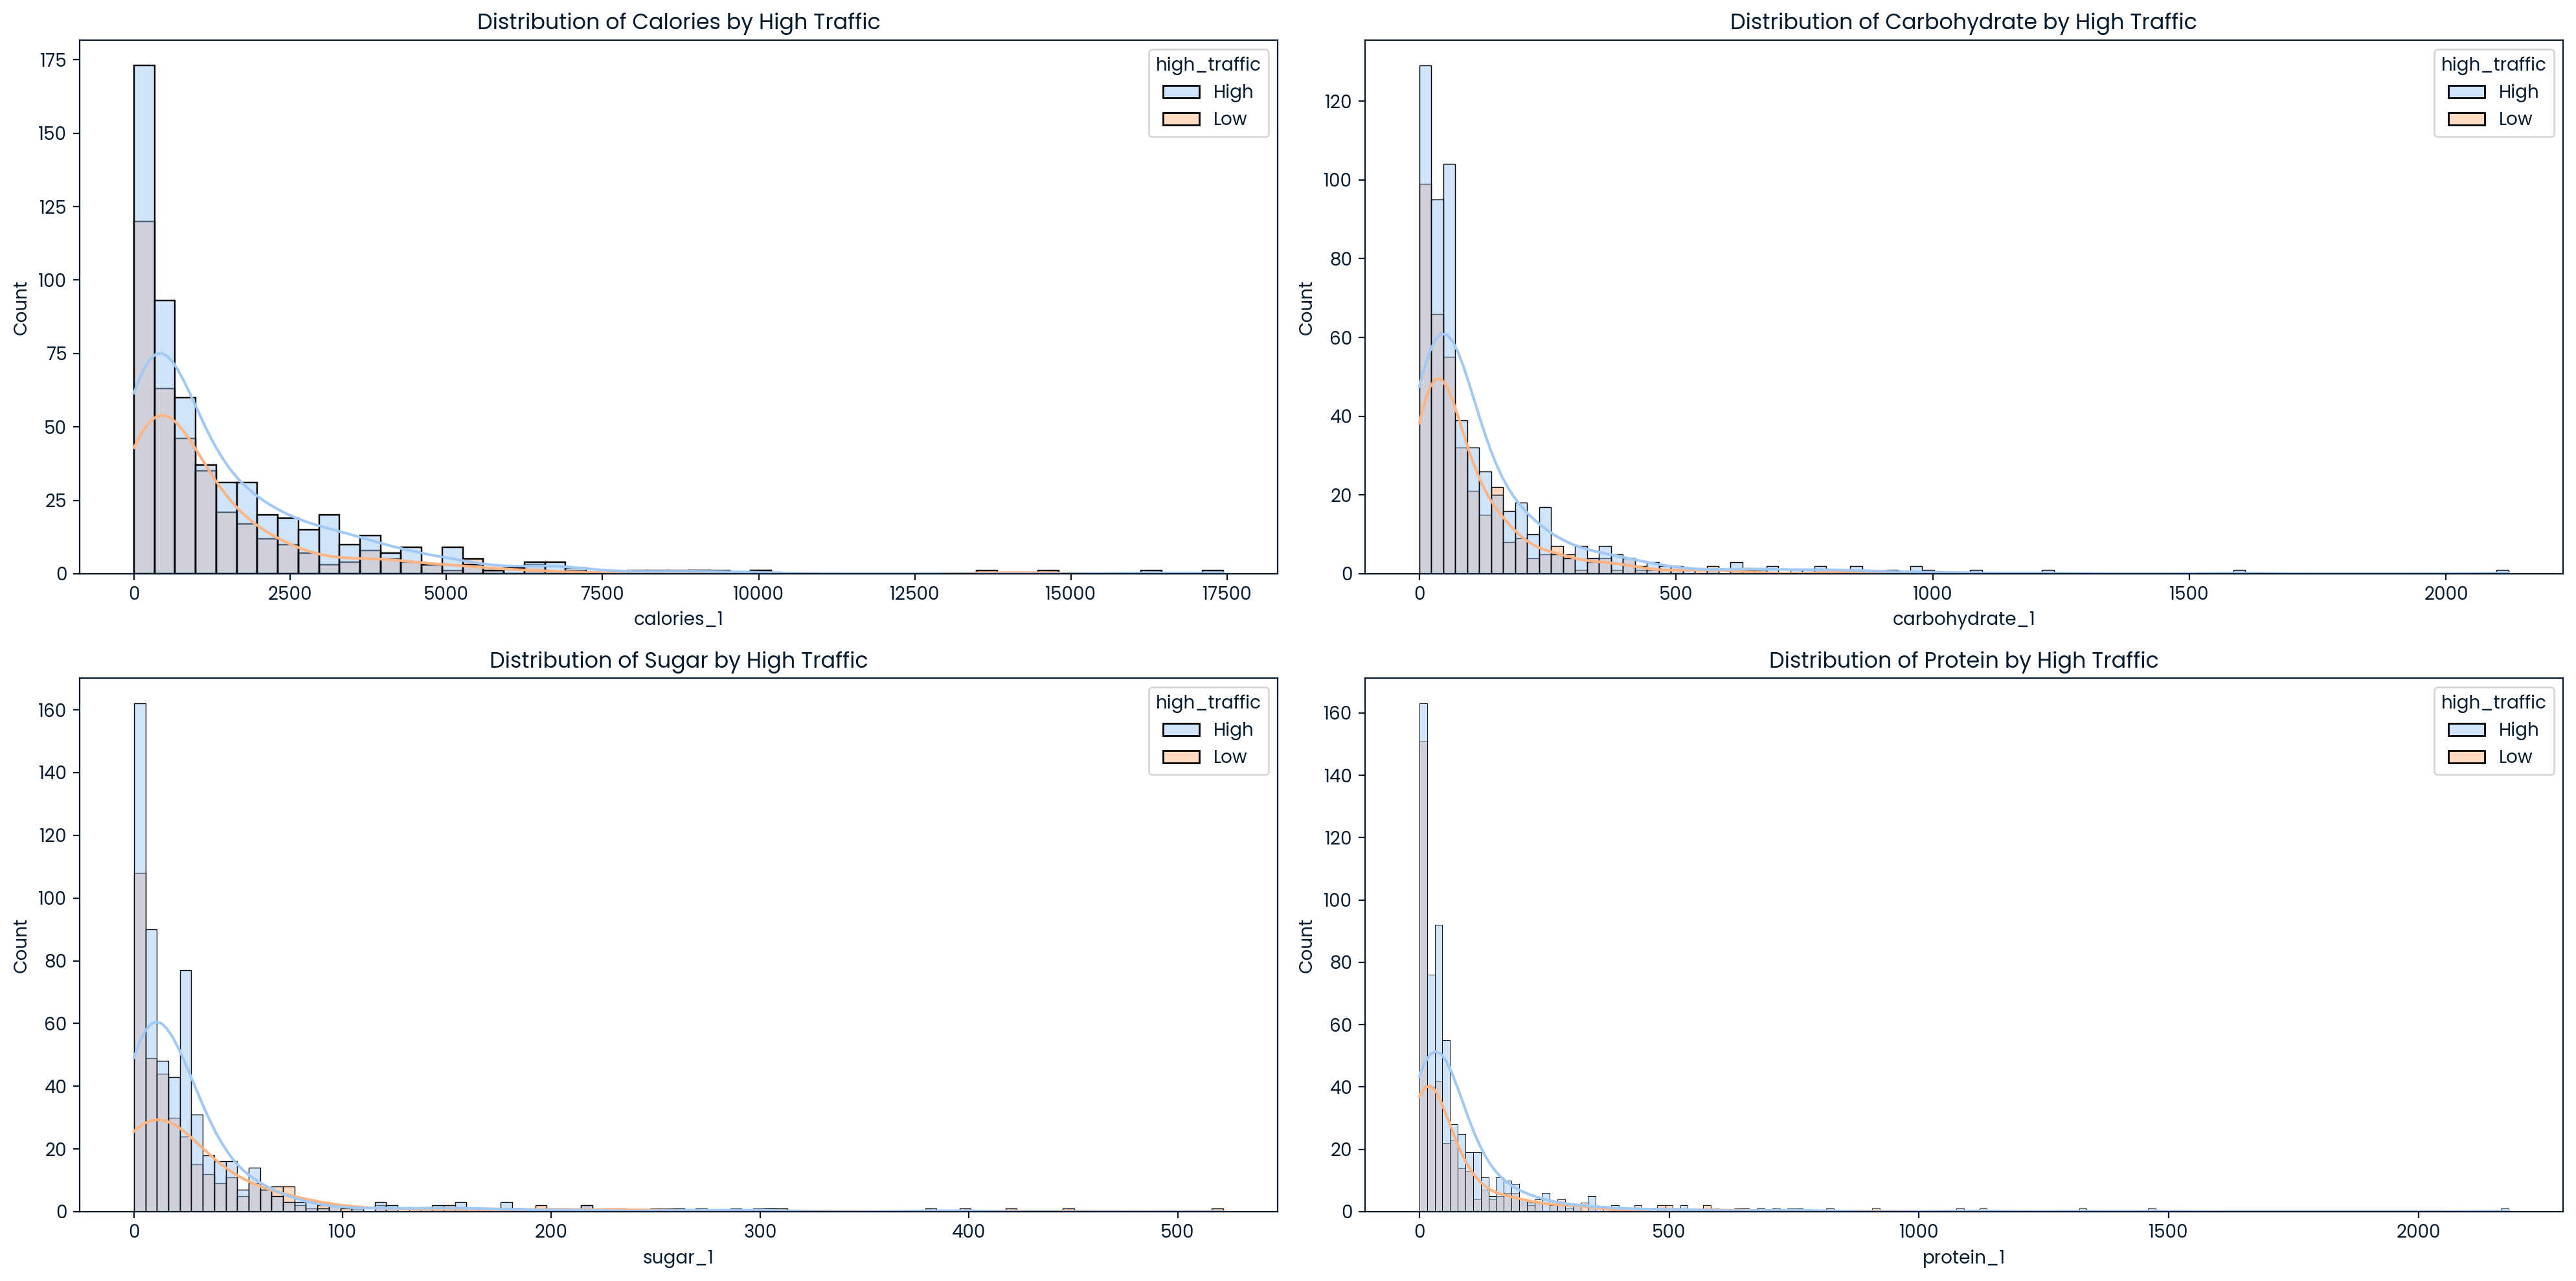

In [33]:
fig, axes = plt.subplots(2, 2, figsize=(20, 10))

# Histogram with KDE for each numeric variable
sns.histplot(data=df, x='calories_1', hue='high_traffic', kde=True, ax=axes[0, 0])
axes[0, 0].set_title('Distribution of Calories by High Traffic')

sns.histplot(data=df, x='carbohydrate_1', hue='high_traffic', kde=True, ax=axes[0, 1])
axes[0, 1].set_title('Distribution of Carbohydrate by High Traffic')

sns.histplot(data=df, x='sugar_1', hue='high_traffic', kde=True, ax=axes[1, 0])
axes[1, 0].set_title('Distribution of Sugar by High Traffic')

sns.histplot(data=df, x='protein_1', hue='high_traffic', kde=True, ax=axes[1, 1])
axes[1, 1].set_title('Distribution of Protein by High Traffic')

plt.tight_layout()
plt.show()

### Category variables

The two following charts show the distribution of the category and serving variables. The category variable does not indicate any pattern. I can notice a preference for recipes with 4 servings in the serving variable.

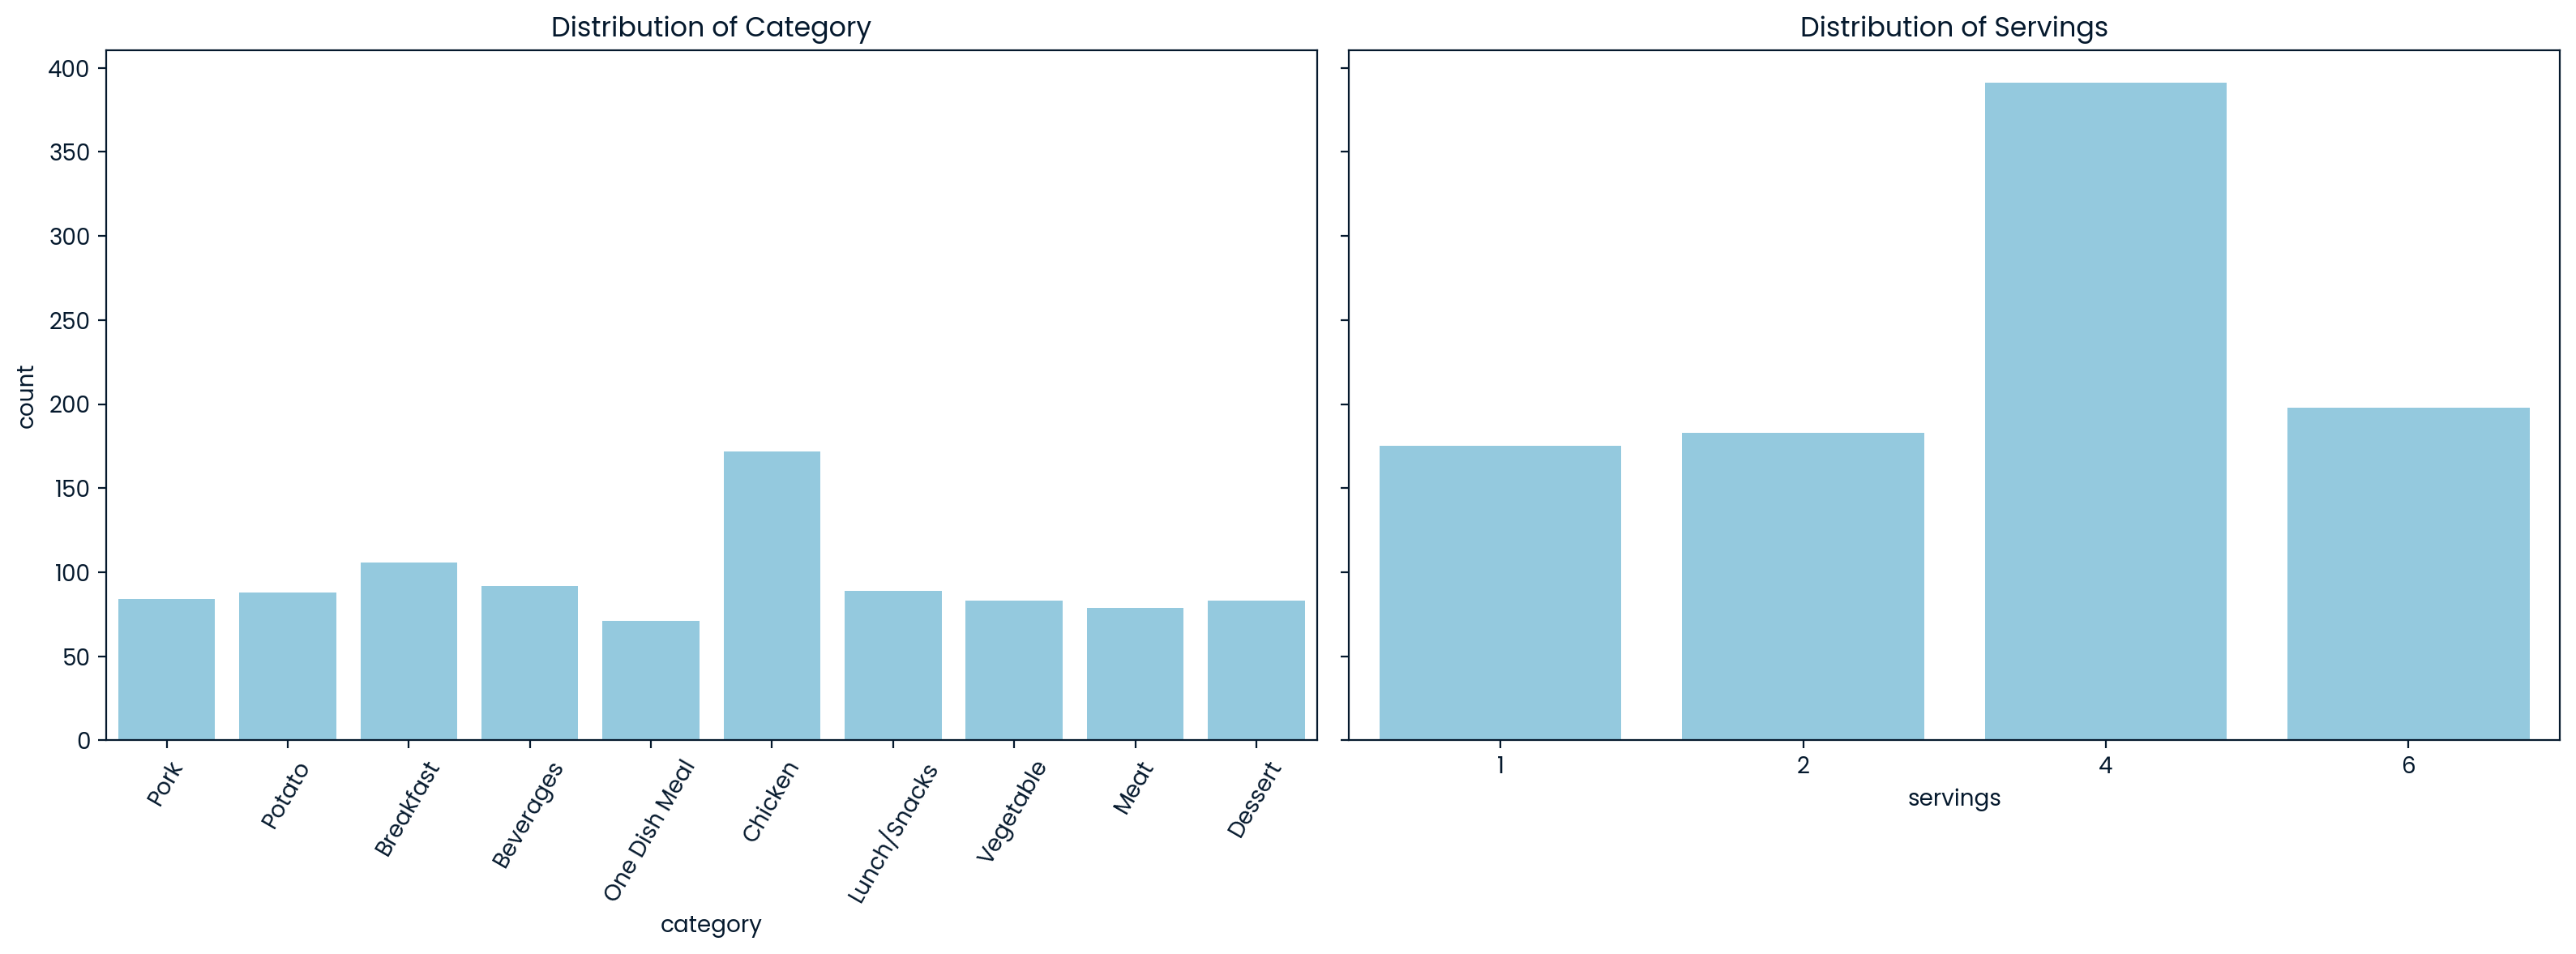

In [34]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6), sharey=True)

sns.countplot(data=df, x="category", ax=axes[0], color='skyblue')
axes[0].set_title('Distribution of Category')
axes[0].tick_params(axis='x', rotation=60)

sns.countplot(data=df, x="servings", ax=axes[1], color='skyblue')
axes[1].set_title('Distribution of Servings')
axes[1].tick_params(axis='x')

plt.tight_layout()
plt.show()

### Relationships

#### category vs high_traffic

Getting deeper, there is an order in the category column with high or not high_traffic. We can notice in the following graph that Potatoes, Vegetables, Pork, Meat, Lunch/Snacks, Desserts and One Dish Meal tend to appear as high-traffic recipes. On beverages and breakfast tend to appear to be low-trafficking recipes. Also, the Chicken appears with more low-trafficking compared to high-trafficking but it moves indifferently.

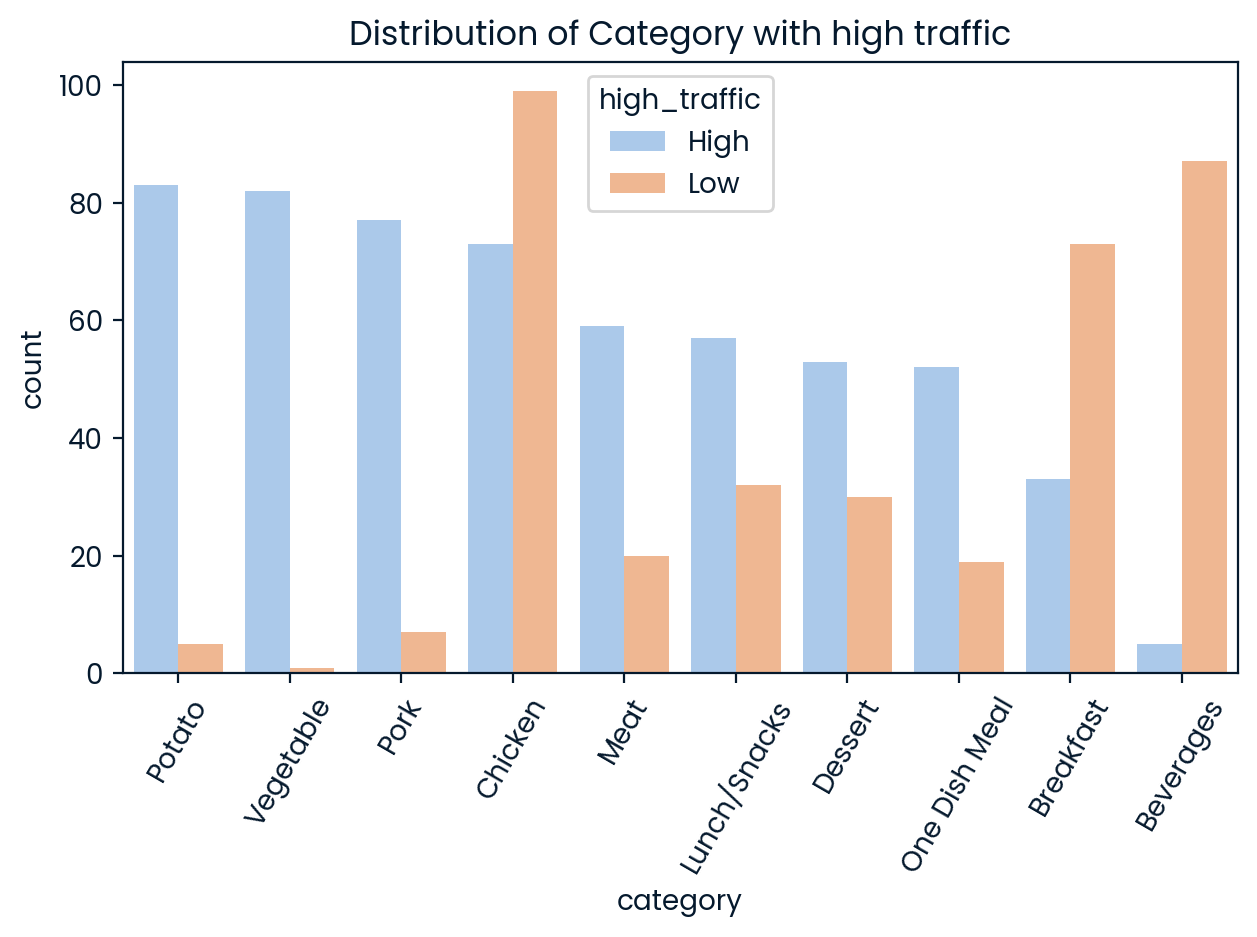

In [35]:
order_ = df.loc[df['high_traffic'] == 'High',"category"].value_counts(ascending = False).index
sns.countplot(data=df, x="category", hue = 'high_traffic', order = order_)
plt.title('Distribution of Category with high traffic')
plt.tick_params(axis='x', rotation=60)

plt.tight_layout()
plt.show()

#### servings vs high_traffic

There is no relationship between the servings and the high_traffic variable, just as we noticed a preference for recipes with four servings.

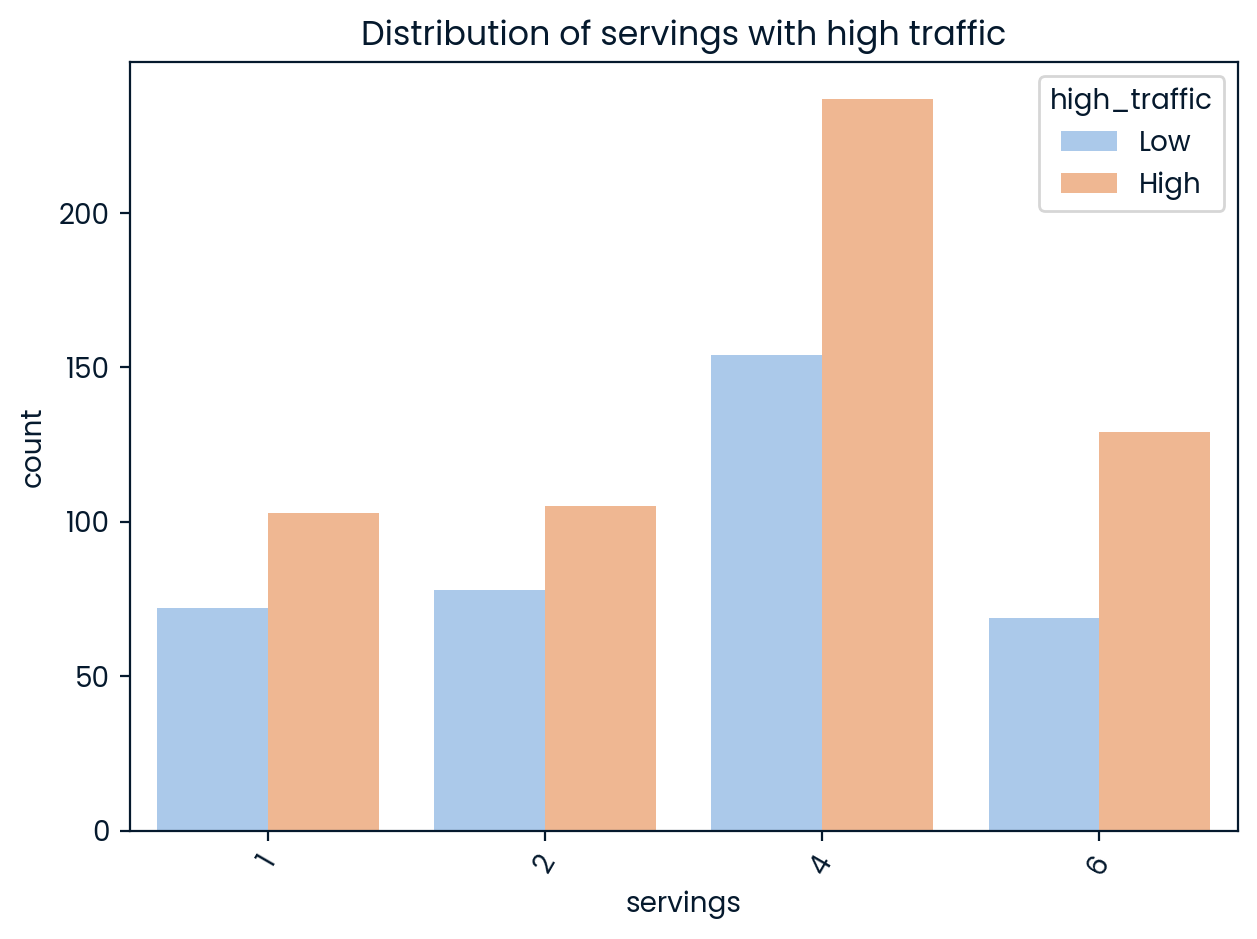

In [36]:
sns.countplot(data=df, x="servings", hue = 'high_traffic')
plt.title('Distribution of servings with high traffic')
plt.tick_params(axis='x', rotation=60)

plt.tight_layout()
plt.show()

#### Hypothesis testing
I performed hypothesis testing to investigate the relationship between the high_traffic variable and the categorical variables.
I used the Chi-Square, which can work with categorical variables, and the purpose of the usage is to identify the significant relationship between categorical variables.

The results of the hypothesis testing for

- high_traffic and servings: Since the p-value is higher than the alpha, you fail to reject the null hypothesis, meaning there is no evidence of a significant relationship between high_traffic and servings.
- high_traffic and category: Since the p-value is essentially zero, less than the alpha, you can reject the null hypothesis, which indicates a strong association between high_traffic and category. This means the distribution of high_traffic is not independent of the category..

In [37]:
contingency_table_servings = pd.crosstab(df['high_traffic'], df['servings'])

chi2_servings, p_servings, dof_servings, expected_servings = stats.chi2_contingency(contingency_table_servings)

print("Chi-Square Test between 'high_traffic' and 'servings'")
print("alpha = 0.05")
print(f"Chi2 Statistic: {chi2_servings}")
print(f"P-value: {p_servings}")
print(f"Degrees of freedom: {dof_servings}")

contingency_table_category = pd.crosstab(df['high_traffic'], df['category'])

chi2_category, p_category, dof_category, expected_category = stats.chi2_contingency(contingency_table_category)

print("\nChi-Square Test between 'high_traffic' and 'category'")
print("alpha = 0.05")
print(f"Chi2 Statistic: {chi2_category}")
print(f"P-value: {p_category}")
print(f"Degrees of freedom: {dof_category}")


Chi-Square Test between 'high_traffic' and 'servings'
alpha = 0.05
Chi2 Statistic: 2.7369889309788054
P-value: 0.4339779666711946
Degrees of freedom: 3

Chi-Square Test between 'high_traffic' and 'category'
alpha = 0.05
Chi2 Statistic: 318.2935223075693
P-value: 3.417304408371004e-63
Degrees of freedom: 9


#### numeric variables vs high_traffic

Here is the spread of the data for numeric variables. There are many outliers across all the numeric variables comparing the numeric variable to the high_traffic variable. Also, the median and IQR between the high_traffic for each numeric variable do not indicate a big difference. 

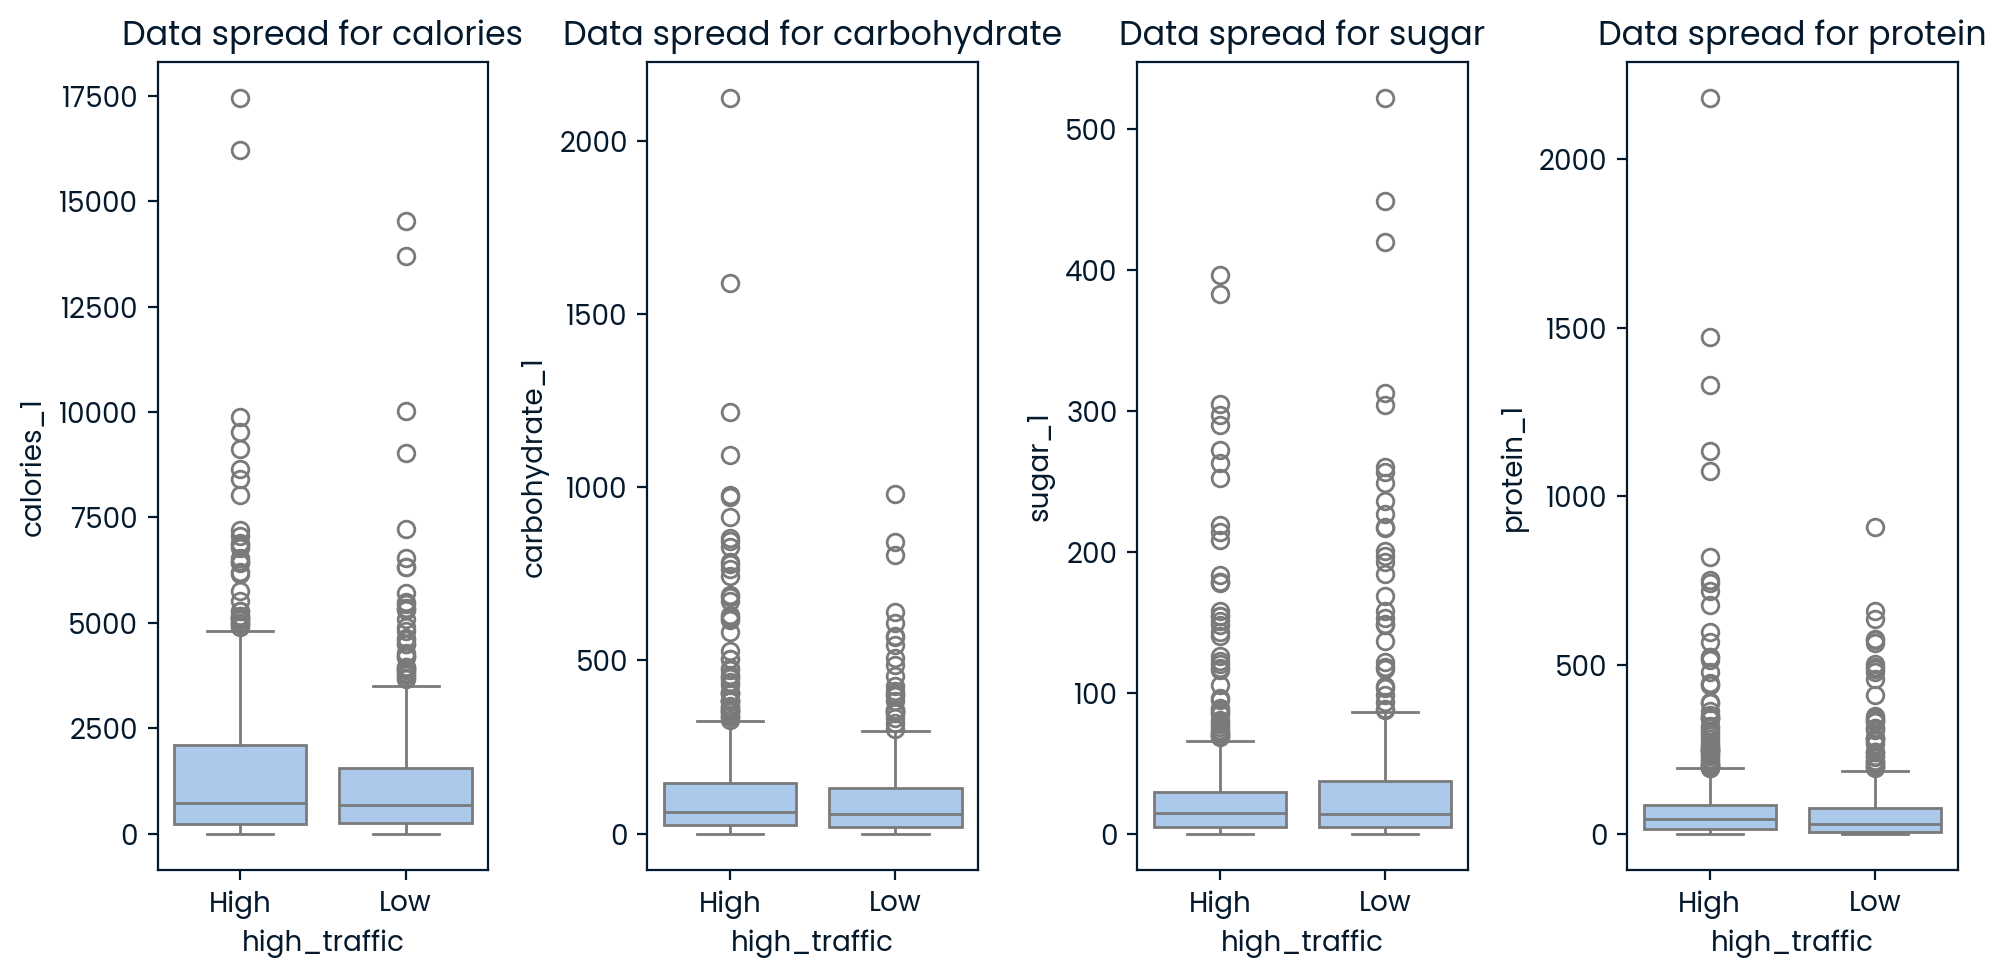

In [38]:
fig, axes = plt.subplots(1, 4, figsize=(10, 5), sharey=False)
			
sns.boxplot(data=df, x="high_traffic", y = 'calories_1', ax=axes[0])
axes[0].set_title('Data spread for calories')

sns.boxplot(data=df, x="high_traffic", y = 'carbohydrate_1', ax=axes[1])
axes[1].set_title('Data spread for carbohydrate')

sns.boxplot(data=df, x="high_traffic", y = 'sugar_1', ax=axes[2])
axes[2].set_title('Data spread for sugar')

sns.boxplot(data=df, x="high_traffic", y = 'protein_1', ax=axes[3])
axes[3].set_title('Data spread for protein')

plt.tight_layout()
plt.show()

---
## Model Fitting & Evaluation

The prediction of which recipes will be popular, given the target variable is a binary column, indicates the use of a supervised classification model. The first model I choose is the Logistic Regression because it identifies relationships between features and the target. The second model is the Random Forest Classifier because it combines multiple decision trees, which makes it robust and accurate.

I will fit the model with the category, servings, nutritional multiple with servings, and the target variable, which is high-traffick

- I normalized the numeric features for the Logistic Regression model
- I convert the categorical variables into numeric features

In [39]:
ml_dict = {}
ml_dict['LR'] = {}
ml_dict['RF'] = {}
df_copy = df.copy()

le = LabelEncoder()
scaler = StandardScaler()

df_copy['category'] = le.fit_transform(df_copy['category'])
df_copy['servings'] = le.fit_transform(df_copy['servings'])
df_copy['high_traffic'] = le.fit_transform(df_copy['high_traffic'])

#### Logistic Regression
- Split and fit the model
- Make the predictions
- Calculate the accuracy

In [40]:
X = df_copy.drop(columns='high_traffic')
y = df_copy['high_traffic']

X[['calories_1']] = scaler.fit_transform(X[['calories_1']])
X[['carbohydrate_1']] = scaler.fit_transform(X[['carbohydrate_1']])
X[['sugar_1']] = scaler.fit_transform(X[['sugar_1']])
X[['protein_1']] = scaler.fit_transform(X[['protein_1']])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

lr = LogisticRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

ml_dict['LR']['Accuracy score'] = accuracy_score(y_test, y_pred)

feature_importance_lr = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': np.abs(lr.coef_[0])
}).sort_values(by='Importance', ascending=False)

X_train_lr = X_train
X_test_lr = X_test
y_train_lr = y_train
y_test_lr = y_test
y_pred_lr = y_pred

#### Random Forest Classifier
- Split and fit the model
- Make the predictions
- Calculate the accuracy

In [41]:
X = df_copy.drop(columns='high_traffic')
y = df_copy['high_traffic']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

best_score_rf = -1
best_params_rf = {}
for n_estimators, max_depth, min_samples_split, min_samples_leaf in product(
        param_grid_rf['n_estimators'], param_grid_rf['max_depth'], 
        param_grid_rf['min_samples_split'], param_grid_rf['min_samples_leaf']):
    
    rf_model = RandomForestClassifier(
        n_estimators=n_estimators,
        max_depth=max_depth,
        min_samples_split=min_samples_split,
        min_samples_leaf=min_samples_leaf,
        random_state=42
    )
    rf_model.fit(X_train, y_train)
    y_pred_rf = rf_model.predict(X_test)
    score_rf = accuracy_score(y_test, y_pred_rf)
    
    if score_rf > best_score_rf:
        best_score_rf = score_rf

        
        ml_dict['RF']['Accuracy score'] = accuracy_score(y_test, y_pred_rf)
        best_params = {
            'n_estimators': n_estimators,
            'max_depth': max_depth,
            'min_samples_split': min_samples_split,
            'min_samples_leaf': min_samples_leaf
        }

        best_rf_model = rf_model
        best_y_pred_rf = y_pred_rf

feature_importance_rf = pd.DataFrame({
    'Feature': X.columns,
    'Importance': best_rf_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

In [42]:
ml_dict

{'LR': {'Accuracy score': 0.7578947368421053},
 'RF': {'Accuracy score': 0.7473684210526316}}

##### ** Based on accuracy, the Logistic Regression is more appropriate for the predictions.

#### The future importance from Logistic Regression model and Random Forest model

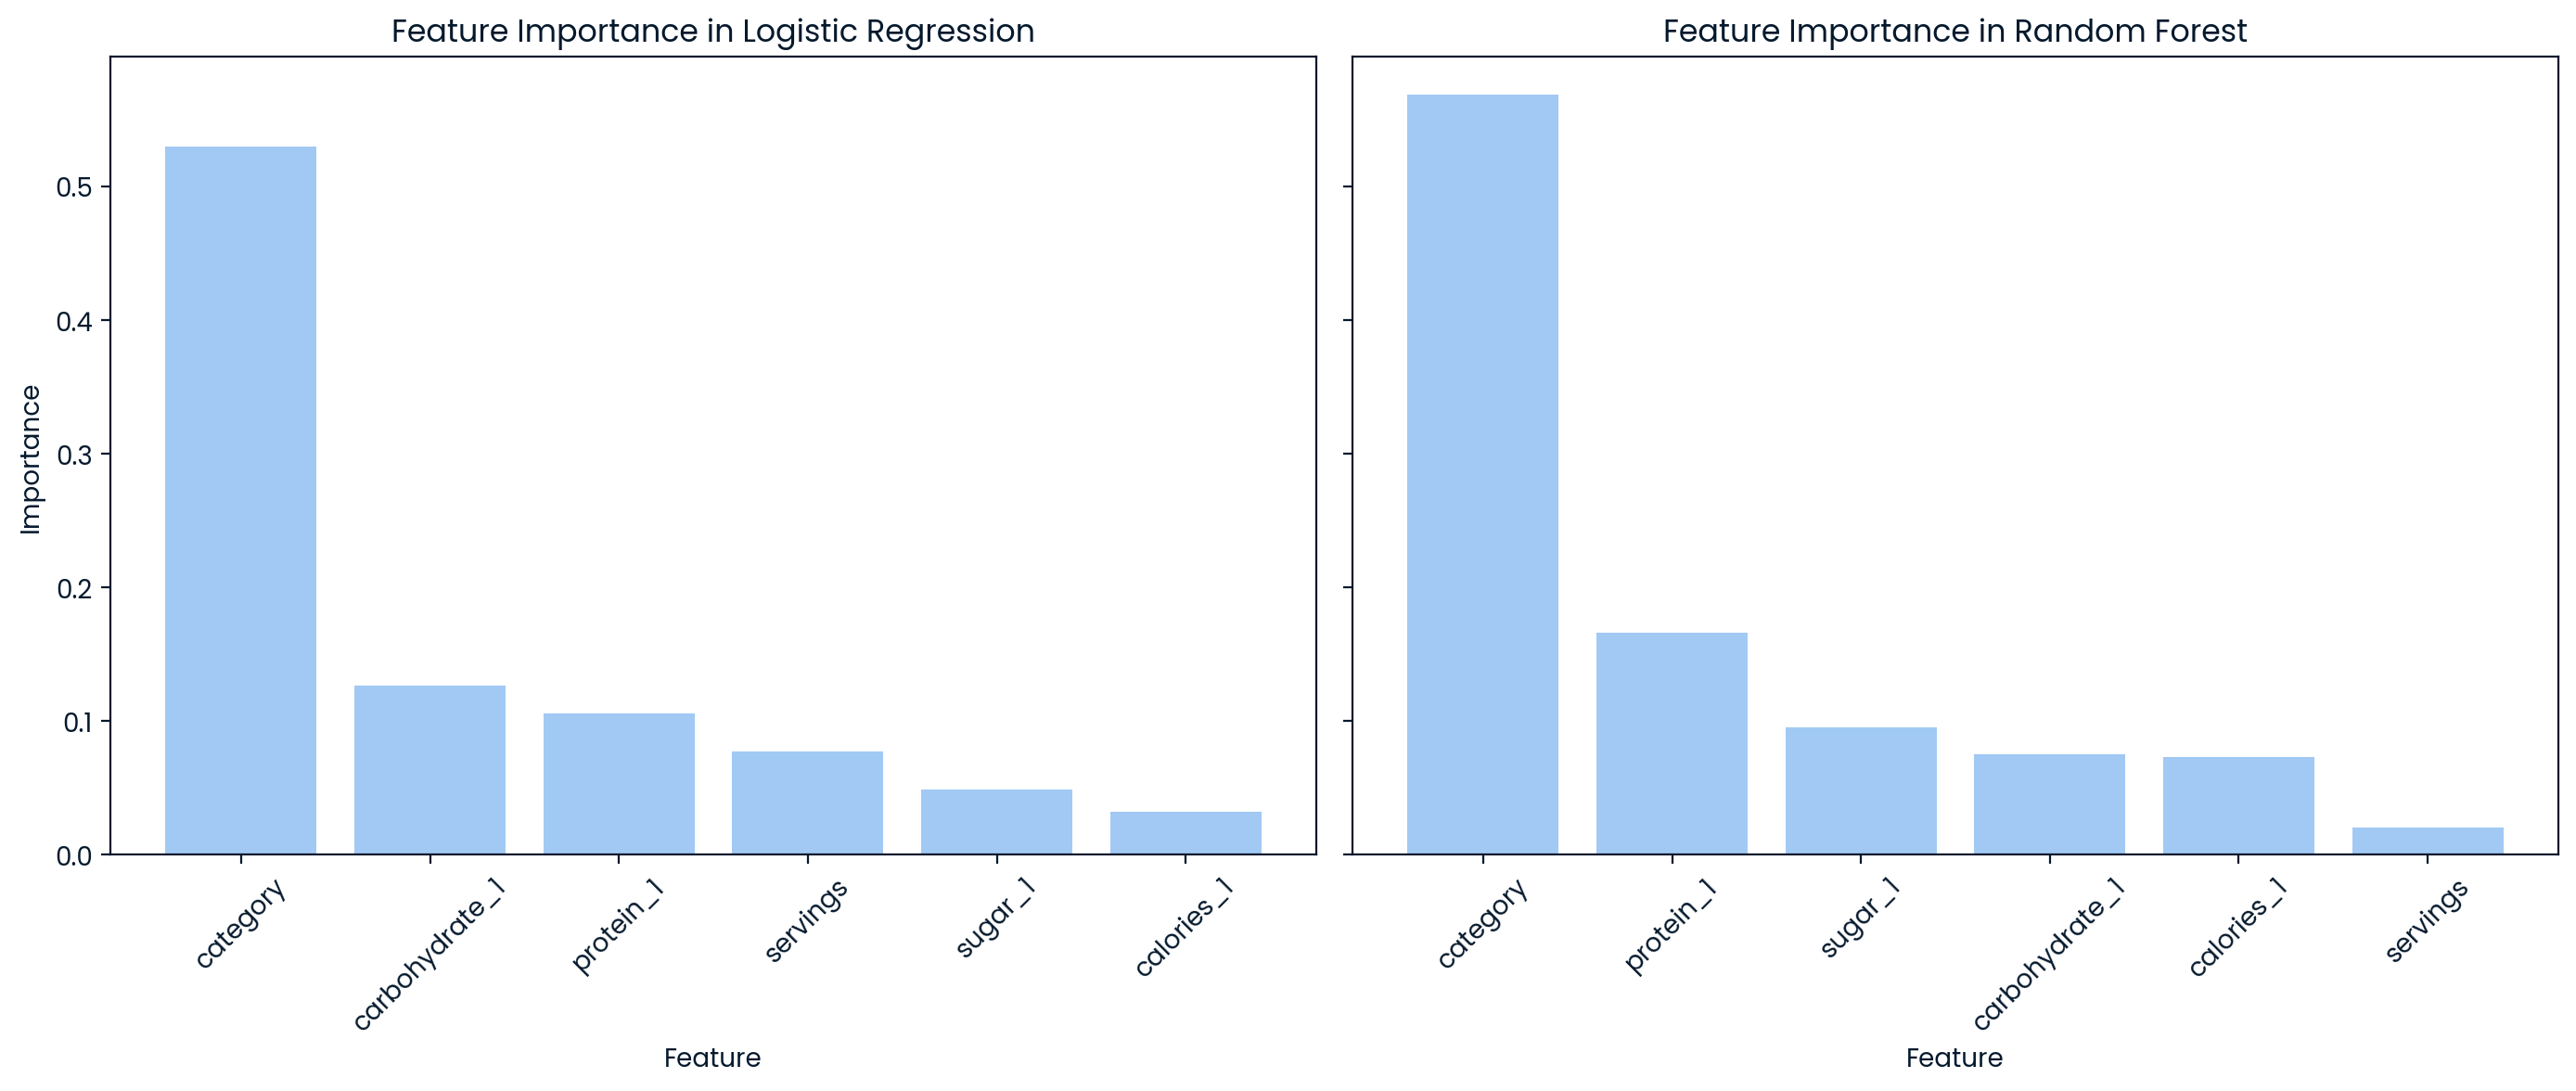

In [43]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharey=True)

axes[0].bar(feature_importance_lr['Feature'], feature_importance_lr['Importance'])
axes[0].set_ylabel("Importance")
axes[0].set_xlabel("Feature")
axes[0].set_title("Feature Importance in Logistic Regression")
axes[0].tick_params(axis='x', rotation=45)

axes[1].bar(feature_importance_rf['Feature'], feature_importance_rf['Importance'])
axes[1].set_xlabel("Feature")
axes[1].set_title("Feature Importance in Random Forest")
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

#### Other metrics

Finding the Specificity and Sensitivity score and the optimal threshold (maximizing Youden's J) for the Logistic Regression and Random Forest models.

##### Logistic Regression

Optimal Threshold (maximizing Youden's J): 0.49
Sensitivity at Optimal Threshold: 0.79
Specificity at Optimal Threshold: 0.74


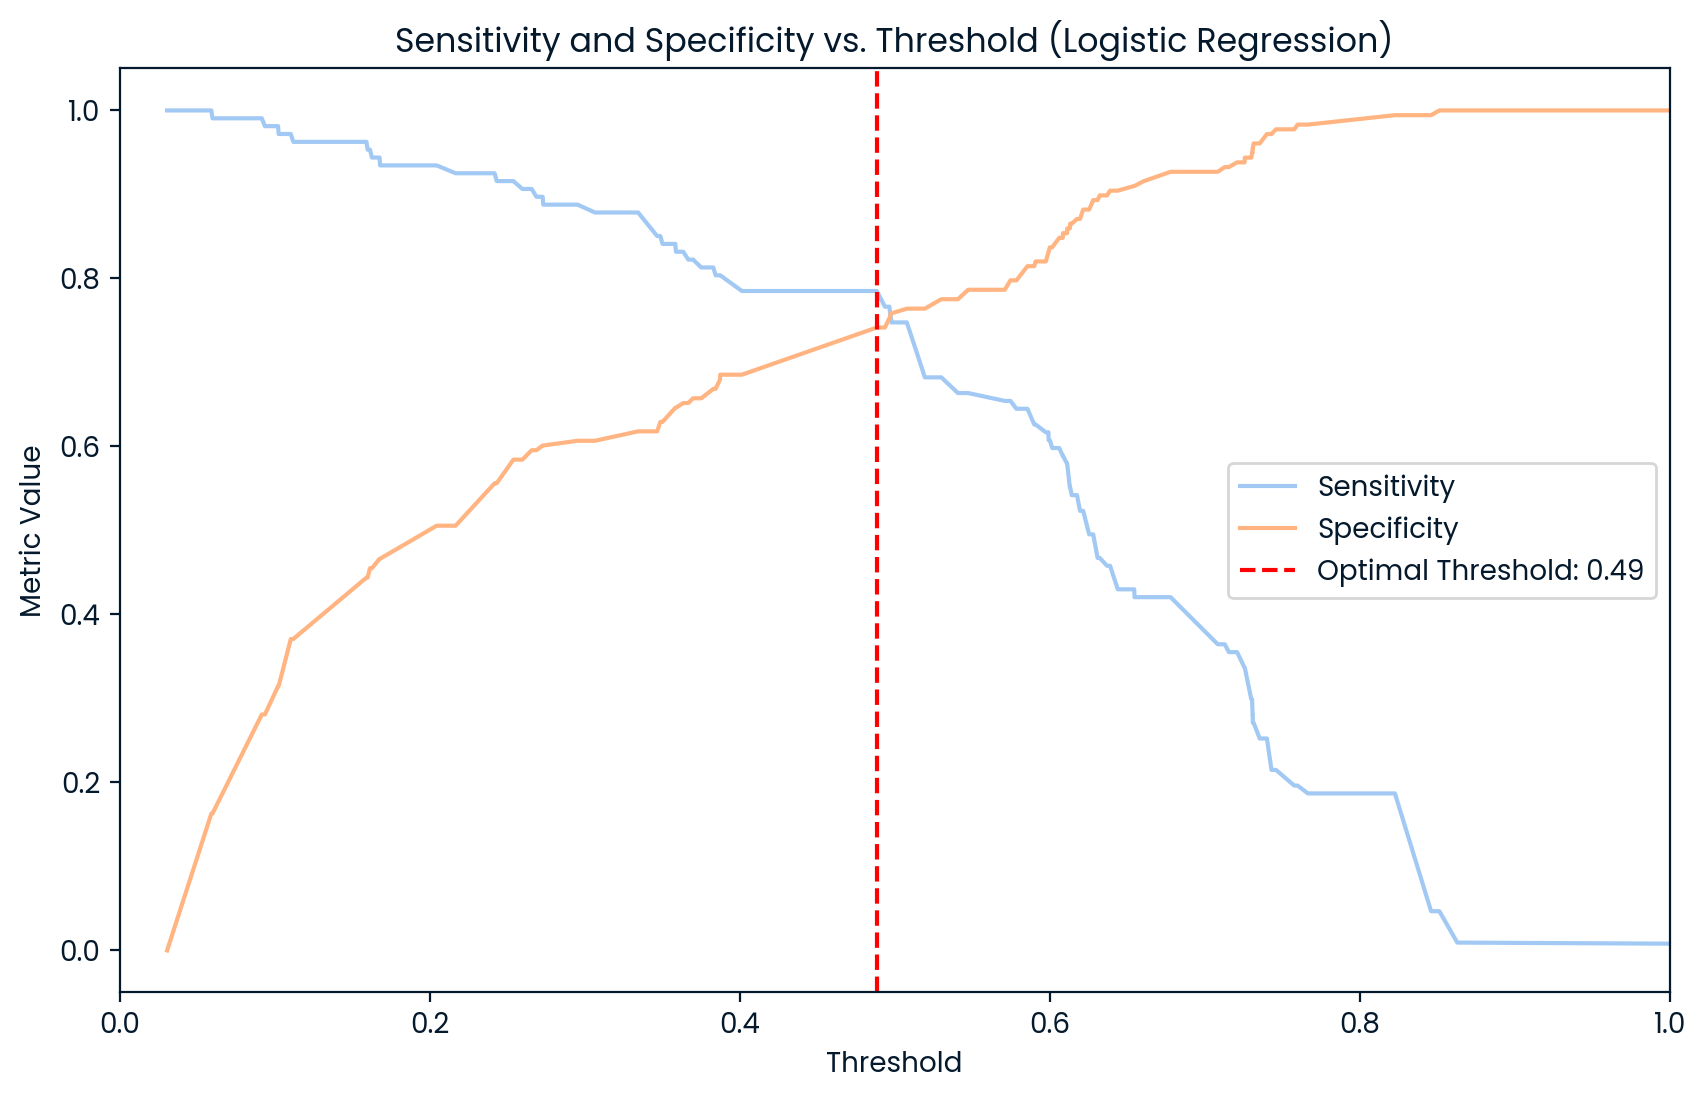

In [48]:
y_prob_lr = lr.predict_proba(X_test_lr)[:, 1]

fpr, tpr, thresholds_lr = roc_curve(y_test_lr, y_prob_lr)

specificity_lr = 1 - fpr
sensitivity_lr = tpr

youden_j_lr = sensitivity_lr + specificity_lr - 1
optimal_idx_lr = np.argmax(youden_j_lr)
optimal_threshold_lr = thresholds_lr[optimal_idx_lr]

print(f"Optimal Threshold (maximizing Youden's J): {optimal_threshold_lr:.2f}")
print(f"Sensitivity at Optimal Threshold: {sensitivity_lr[optimal_idx_lr]:.2f}")
print(f"Specificity at Optimal Threshold: {specificity_lr[optimal_idx_lr]:.2f}")

plt.figure(figsize=(10, 6))
plt.plot(thresholds_lr, sensitivity_lr, label='Sensitivity')
plt.plot(thresholds_lr, specificity_lr, label='Specificity')
plt.axvline(x=optimal_threshold_lr, color='r', linestyle='--', label=f'Optimal Threshold: {optimal_threshold_lr:.2f}')
plt.xlabel("Threshold")
plt.ylabel("Metric Value")
plt.title("Sensitivity and Specificity vs. Threshold (Logistic Regression)")
plt.xlim(0, 1)
plt.legend()
plt.show()


##### Random Forest

Optimal Threshold (maximizing Youden's J): 0.48
Sensitivity at Optimal Threshold: 0.71
Specificity at Optimal Threshold: 0.78


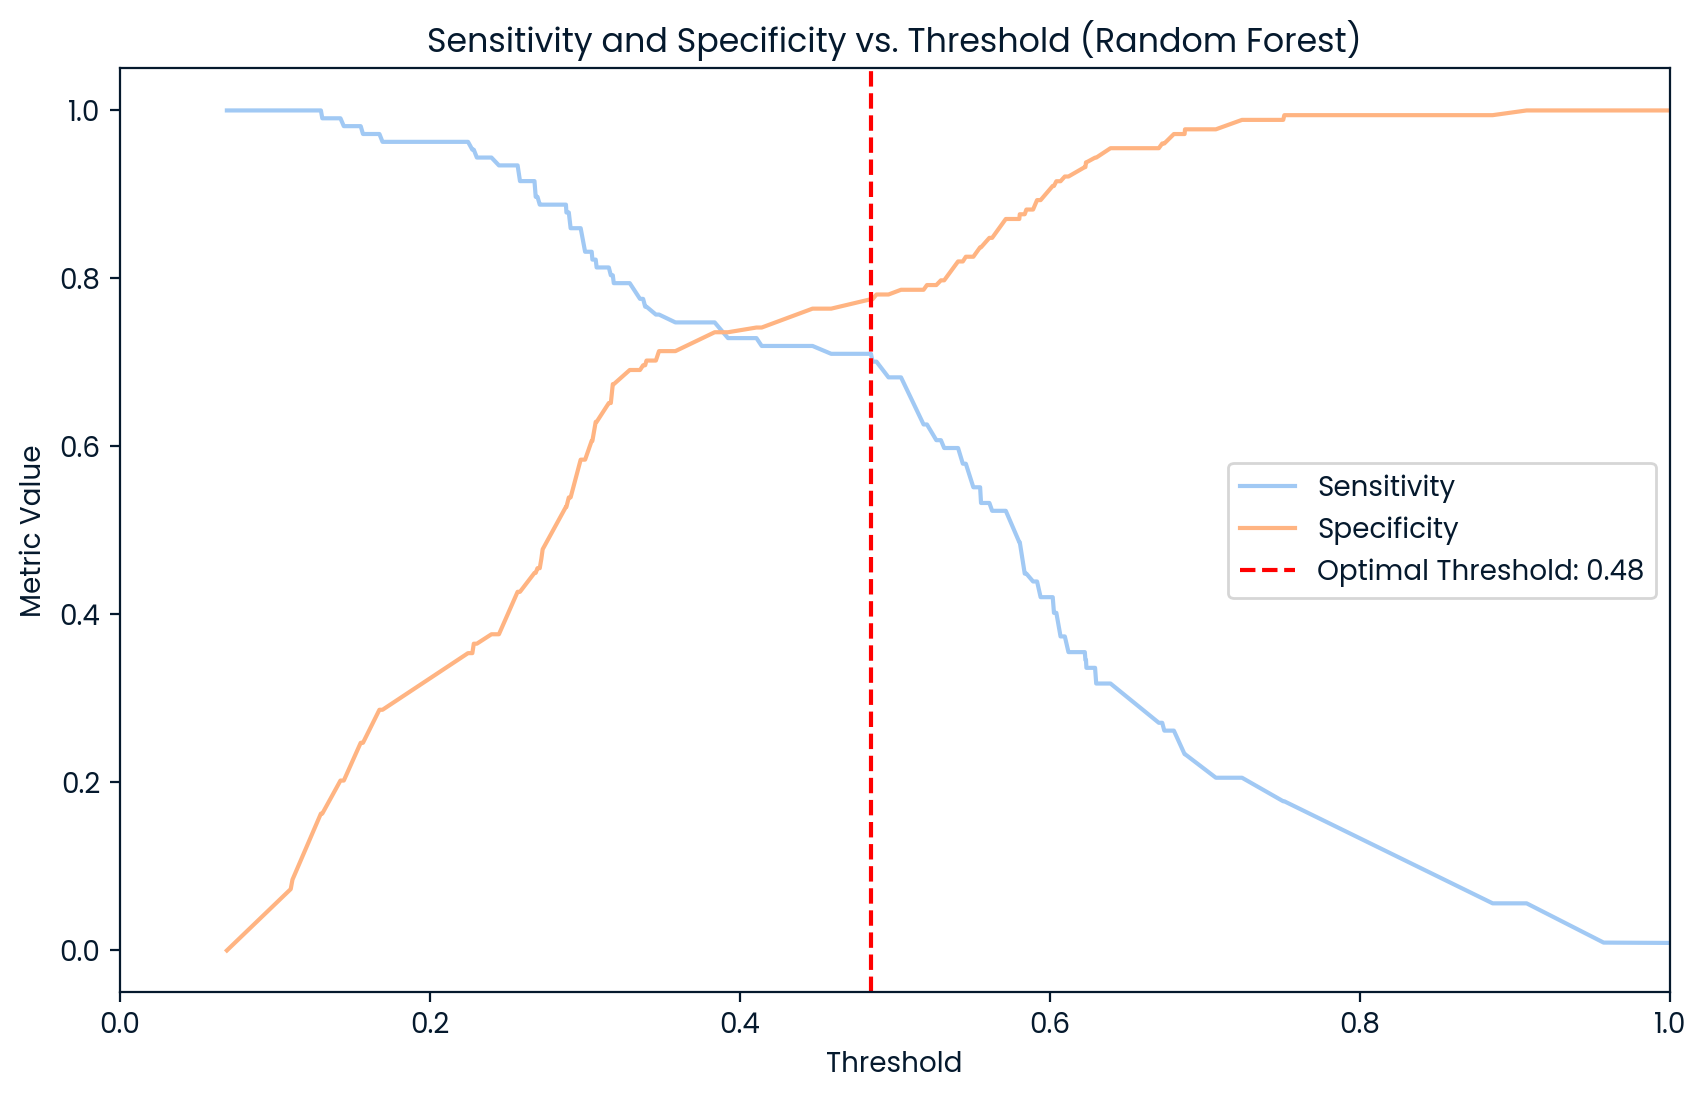

In [47]:
y_prob = best_rf_model.predict_proba(X_test)[:, 1]

fpr, tpr, thresholds_rf = roc_curve(y_test, y_prob)

specificity_rf = 1 - fpr
sensitivity_rf = tpr

youden_j_rf = sensitivity_rf + specificity_rf - 1
optimal_idx_rf = np.argmax(youden_j_rf)
optimal_threshold_rf = thresholds_rf[optimal_idx_rf]

print(f"Optimal Threshold (maximizing Youden's J): {optimal_threshold_rf:.2f}")
print(f"Sensitivity at Optimal Threshold: {sensitivity_rf[optimal_idx_rf]:.2f}")
print(f"Specificity at Optimal Threshold: {specificity_rf[optimal_idx_rf]:.2f}")

plt.figure(figsize=(10, 6))
plt.plot(thresholds_rf, sensitivity_rf, label='Sensitivity')
plt.plot(thresholds_rf, specificity_rf, label='Specificity')
plt.axvline(x=optimal_threshold_rf, color='r', linestyle='--', label=f'Optimal Threshold: {optimal_threshold_rf:.2f}')
plt.xlabel("Threshold")
plt.ylabel("Metric Value")
plt.title("Sensitivity and Specificity vs. Threshold (Random Forest)")
plt.xlim(0, 1)
plt.legend()
plt.show()


---
## Results

The problem requires predicting 80% of the most popular recipes and minimizing the chance of showing unpopular recipes. I used the Sensitivity, Specificity, and accuracy metrics to reach these requirements. 
- Accuracy measures the performance of the model.
- Sensitivity measures the proportion of actual positive cases correctly identified by the model.
- Specificity measures the proportion of actual negative cases correctly identified by the model.

The metrics for the first model, Logistic Regression, are an Accuracy of 0.76, and  with a threshold of 0.49, a Sensitivity of 0.79, and a Specificity of 0.74
The metrics for the first model, Random Forest, are an Accuracy of 0.75, and with a threshold of 0.48, a Sensitivity of 0.71, and a Specificity of 0.78

There is a difference between the two models in Sensitivity, Specificity and Accuracy.
With Logistic Regression, Accuracy and Sensitivity appear higher compared to Random Forest. Instead the Specificity is higher for the Random Forest model
The most significant part of the decision is based on the Sensitivity. Given that, I decided to use Logistic Regression for further predictions.

Optimal Threshold (maximizing Youden's J): 0.49
Sensitivity at Optimal Threshold: 0.79
Specificity at Optimal Threshold: 0.74


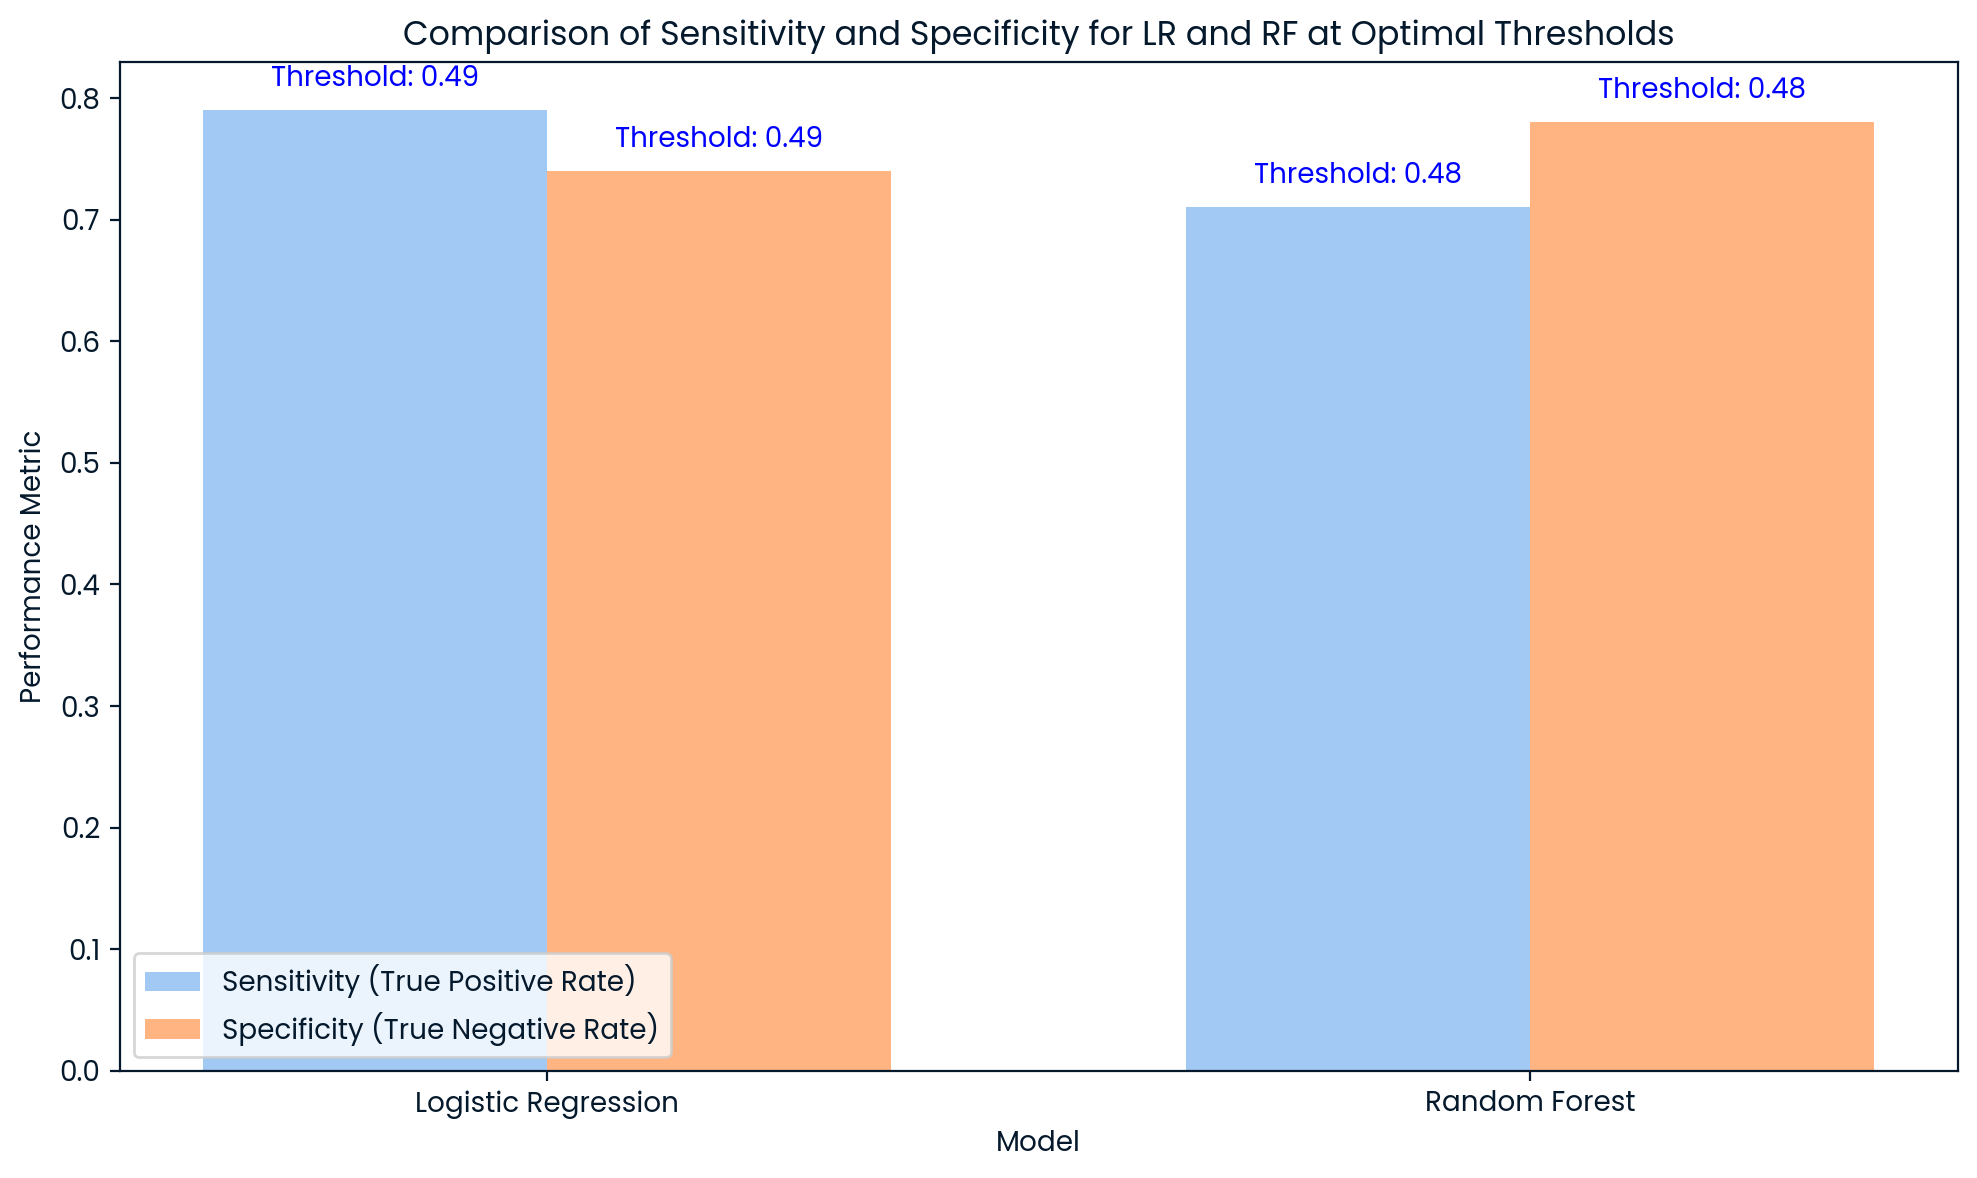

In [46]:
print(f"Optimal Threshold (maximizing Youden's J): {optimal_threshold_lr:.2f}")
print(f"Sensitivity at Optimal Threshold: {sensitivity_lr[optimal_idx_lr]:.2f}")
print(f"Specificity at Optimal Threshold: {specificity_lr[optimal_idx_lr]:.2f}")

models = ['Logistic Regression', 'Random Forest']
thresholds = [round(optimal_threshold_lr,2), round(optimal_threshold_rf,2)]
sensitivity = [round(sensitivity_lr[optimal_idx_lr],2), round(sensitivity_rf[optimal_idx_rf],2)]
specificity = [round(specificity_lr[optimal_idx_lr],2), round(specificity_rf[optimal_idx_rf],2)]

fig, ax = plt.subplots(figsize=(10, 6))

bar_width = 0.35
index = np.arange(len(models))

sensitivity_bars = ax.bar(index, sensitivity, bar_width, label='Sensitivity (True Positive Rate)')

specificity_bars = ax.bar(index + bar_width, specificity, bar_width, label='Specificity (True Negative Rate)')

for i, (thresh, sens, spec) in enumerate(zip(thresholds, sensitivity, specificity)):
    ax.text(i, sens + 0.02, f'Threshold: {thresh}', ha='center', color='blue', fontsize=10)
    ax.text(i + bar_width, spec + 0.02, f'Threshold: {thresh}', ha='center', color='blue', fontsize=10)

ax.set_xlabel('Model')
ax.set_ylabel('Performance Metric')
ax.set_title('Comparison of Sensitivity and Specificity for LR and RF at Optimal Thresholds')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(models)
ax.legend(loc='lower left')

plt.tight_layout()
plt.show()


---
## Recommendation

The main goal of the problem is to reach the prediction of 80% popular recipes, which has not been achieved. Based on the preferable model, I can predict 79% of popular and 74% of unpopular recipes. 

Beyond that, I recommend the following steps:
- To improve the model, we need to collect more feature variables that affect the target variables, such as the type, gender, or region of the visitors, the time spent on the recipes, or the cost. Additional features may isolate the false positives and false negatives recipes.
- Deploy the model and compare the predictions with the future actual values.
- Find and fix the errors, improving the accuracy, Sensitivity, and Specificity.
- Make it automated for more frequent examination and performance. Keep investigating the model each month.
- Fit the model with more data, letting the model better understand the correlation between feature and target variables.
- Tuning the parameters of the model

This will help to improve the model and achieve more efficient results.